In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np
from hyperparameters import radius, n

In [15]:
render=False

In [16]:
radius

50

In [17]:
n

8

In [18]:
df = pd.read_csv('out.csv')
df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,Unnamed: 16
0,49.759165,4.900858,-49.759165,4.900858,-49.759165,-4.900858,49.759165,-4.900858,49.039194,9.754517,-49.039194,9.754517,-49.039194,-9.754517,49.039194,-9.754517,NaN
1,49.759023,4.900859,-49.759023,4.900859,-49.759023,-4.900859,49.759023,-4.900859,49.039053,9.754520,-49.039053,9.754520,-49.039053,-9.754520,49.039053,-9.754520,NaN
2,49.758809,4.900860,-49.758809,4.900862,-49.758809,-4.900861,49.758809,-4.900861,49.038843,9.754524,-49.038843,9.754523,-49.038843,-9.754524,49.038843,-9.754523,NaN
3,49.758524,4.900862,-49.758524,4.900865,-49.758524,-4.900864,49.758524,-4.900864,49.038562,9.754529,-49.038562,9.754529,-49.038562,-9.754529,49.038562,-9.754529,NaN
4,49.758168,4.900865,-49.758168,4.900868,-49.758168,-4.900867,49.758168,-4.900867,49.038211,9.754535,-49.038211,9.754537,-49.038211,-9.754534,49.038211,-9.754536,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,-59.314938,6.154974,59.220763,5.947841,59.253026,-6.039876,-59.243129,-5.732602,-58.495803,11.364507,58.362307,11.774320,58.285778,-11.726282,-58.415918,-11.914800,NaN
3966,-59.314938,6.154974,59.220763,5.947841,59.253026,-6.039876,-59.243129,-5.732602,-58.495803,11.364507,58.362307,11.774320,58.315746,-11.727674,-58.415918,-11.914800,NaN
3967,-59.314938,6.154974,59.220763,5.947841,59.253026,-6.039876,-59.243129,-5.732602,-58.495803,11.364507,58.362307,11.774320,58.345717,-11.728990,-58.415918,-11.914800,NaN
3968,-59.314938,6.154974,59.220763,5.947841,59.253026,-6.039876,-59.243129,-5.732602,-58.495803,11.364507,58.362307,11.774320,58.375685,-11.730387,-58.415918,-11.914800,NaN


In [19]:
vel = pd.read_csv('vel.csv')
vel

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,Unnamed: 16
0,-0.007122,0.000064,0.007122,0.000064,0.007122,-0.000064,-0.007122,-0.000064,-0.007019,0.000127,0.007019,0.000127,0.007019,-0.000127,-0.007019,-0.000127,NaN
1,-0.014244,0.000110,0.014243,0.000156,0.014243,-0.000151,-0.014243,-0.000137,-0.014037,0.000269,0.014038,0.000241,0.014037,-0.000267,-0.014037,-0.000247,NaN
2,-0.021365,0.000143,0.021364,0.000242,0.021365,-0.000213,-0.021365,-0.000190,-0.021056,0.000396,0.021056,0.000364,0.021056,-0.000370,-0.021056,-0.000355,NaN
3,-0.028487,0.000207,0.028486,0.000301,0.028487,-0.000279,-0.028487,-0.000265,-0.028074,0.000513,0.028074,0.000552,0.028075,-0.000501,-0.028074,-0.000553,NaN
4,-0.035609,0.000289,0.035608,0.000335,0.035608,-0.000337,-0.035608,-0.000351,-0.035093,0.000624,0.035091,0.000758,0.035094,-0.000558,-0.035092,-0.000710,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.996374,-0.147450,0.000000,0.000000,NaN
3966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.996766,-0.139262,0.000000,0.000000,NaN
3967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.997114,-0.131556,0.000000,0.000000,NaN
3968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.996747,-0.139669,0.000000,0.000000,NaN


In [20]:
acc = pd.read_csv('acc.csv')
acc

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,6x,6y,7x,7y,Unnamed: 16
0,-0.712169,0.006377,0.712169,0.006377,0.712169,-0.006377,-0.712169,-0.006377,-0.701864,0.012692,0.701864,0.012692,0.701864,-0.012692,-0.701864,-0.012692,NaN
1,-0.712169,0.006377,0.712169,0.006377,0.712169,-0.006377,-0.712169,-0.006377,-0.701864,0.012692,0.701864,0.012692,0.701864,-0.012692,-0.701864,-0.012692,NaN
2,-0.712169,0.006377,0.712169,0.006377,0.712169,-0.006377,-0.712169,-0.006377,-0.701864,0.012692,0.701864,0.012692,0.701864,-0.012692,-0.701864,-0.012692,NaN
3,-0.712169,0.006377,0.712169,0.006377,0.712169,-0.006377,-0.712169,-0.006377,-0.701864,0.012692,0.701864,0.012692,0.701864,-0.012692,-0.701864,-0.012692,NaN
4,-0.712169,0.006377,0.712169,0.006377,0.712169,-0.006377,-0.712169,-0.006377,-0.701864,0.012692,0.701864,0.012692,0.701864,-0.012692,-0.701864,-0.012692,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833702,0.027336,0.000000,0.000000,NaN
3966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.798325,0.029670,0.000000,0.000000,NaN
3967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.762029,0.031916,0.000000,0.000000,NaN
3968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.724827,0.034074,0.000000,0.000000,NaN


In [21]:
priority = open('priority.csv', 'r')
priority = priority.read()
priority = priority.split(", ")
priority = np.array([float(x) for x in priority],dtype=np.float16)
priority

array([3.441, 2.67 , 5.43 , 2.748, 3.11 , 4.582, 2.09 , 2.408],
      dtype=float16)

In [22]:
radius

50

In [23]:
#priority = priority.astype('int64')

In [24]:
n

8

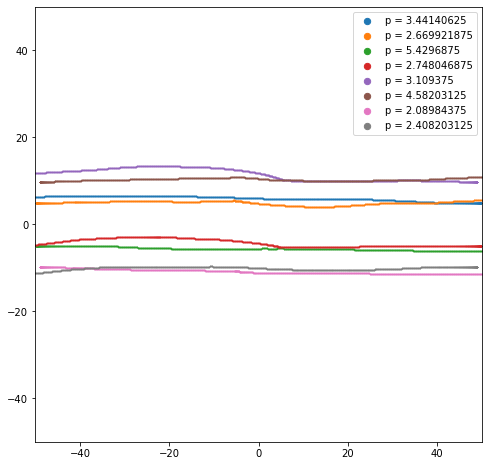

In [25]:
fig,axes = plt.subplots(figsize=(8,8))
axes.set_xlim([-radius,radius])
axes.set_ylim([-radius,radius])
for i in range(n):
    #c = priority[i]
    plt.scatter(df[str(i)+'x'],df[str(i)+'y'],s=0.1, label=f'p = {priority[i]}')
plt.legend(markerscale=20)
#axes.add_patch(plt.Circle((0,0), radius, fill=False))
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


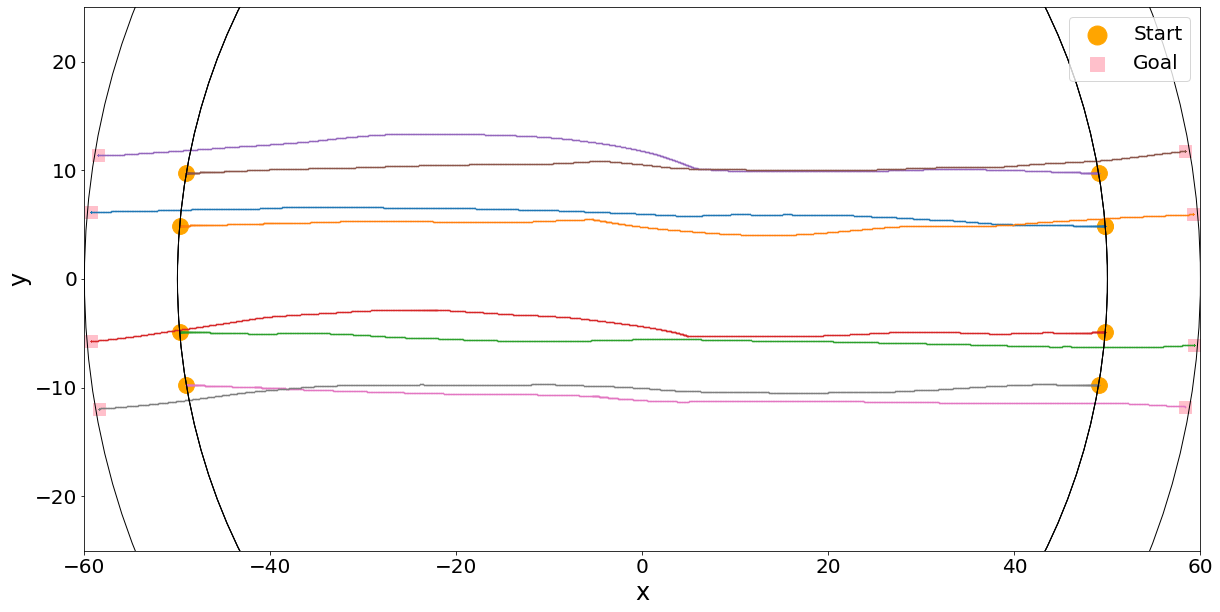

In [55]:
fig,axes = plt.subplots(figsize=(20,10))
axes.set_xlim([-radius,radius])
axes.set_ylim([-radius,radius])
starts = []
for i in range(n):
    axes.scatter(df[str(i)+'x'].iloc[0],df[str(i)+'y'].iloc[0], marker="o", color='orange', s=250)
    axes.scatter(df[str(i)+'x'].iloc[-1],df[str(i)+'y'].iloc[-1], marker="s", color='pink', s=125)

axes.scatter(df[str(0)+'x'].iloc[0],df[str(0)+'y'].iloc[0], marker="o", color='orange', s=250, label='Start')
axes.scatter(df[str(0)+'x'].iloc[-1],df[str(0)+'y'].iloc[-1], marker="s", color='pink', s=125, label='Goal')

axes.legend(markerscale=1.2, fontsize=20)

for i in range(n):
    c = priority[i]
    plt.scatter(df[str(i)+'x'],df[str(i)+'y'],s=0.1)
#plt.legend(priority, markerscale=20)

c2 = plt.Circle((0,0), radius, fill=False)
c1 = plt.Circle((0,0), radius, fill=False)
plt.gca().add_artist(c2)
plt.gca().add_artist(c1)

plt.xlim(-1.2*radius, 1.2*radius)
plt.ylim(-radius/2,radius/2)
#plt.ylim(-20,20)

plt.gca().add_patch(plt.Circle((0,0), radius, fill=False))
plt.gca().add_patch(plt.Circle((0,0), 1.2*radius, fill=False))
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)




#plt.show()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/8_paths_spread_piby8.eps', format='eps')

plt.show()

In [27]:
avg_dist = pd.read_csv('avg.csv', header=None)
time = pd.read_csv('time.csv', header=None)

In [28]:
priority

array([3.441, 2.67 , 5.43 , 2.748, 3.11 , 4.582, 2.09 , 2.408],
      dtype=float16)

<BarContainer object of 8 artists>

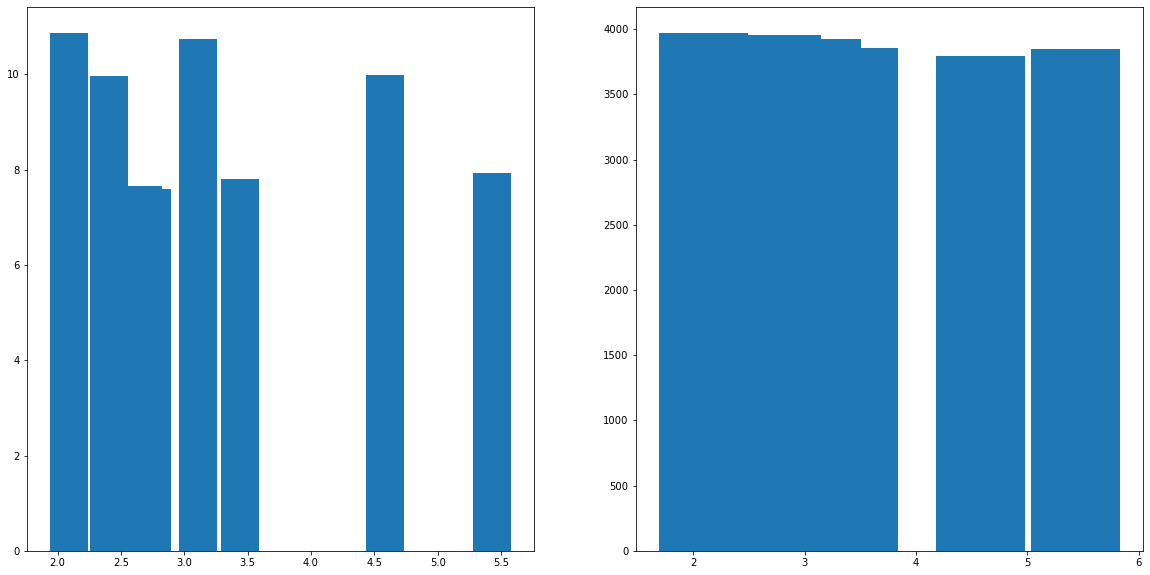

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.bar( priority,avg_dist.iloc[0],width=0.3)
ax2.bar(priority, time.iloc[0])

In [30]:
cmap = plt.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0, 1, n+1)][:-1]

In [31]:
keys = {}
for i in range(len(priority)):
    keys[i]=priority[i]

keys

{0: 3.441, 1: 2.67, 2: 5.43, 3: 2.748, 4: 3.11, 5: 4.582, 6: 2.09, 7: 2.408}

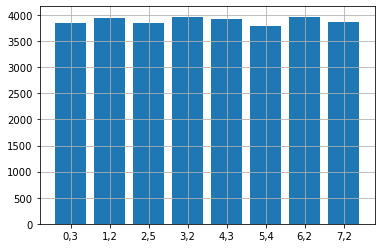

In [32]:
plt.bar([str(i)+','+str(int(priority[i])) for i in range(len(priority))], time.iloc[0])
plt.grid()

In [33]:
dist = np.histogram(priority, 5)
dist[1]

array([2.09 , 2.758, 3.426, 4.094, 4.76 , 5.43 ], dtype=float16)

In [34]:
priority = np.array(priority)

In [35]:
color = np.digitize(priority, dist[1])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


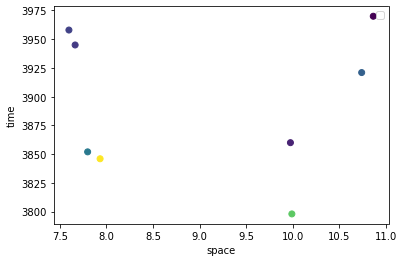

In [36]:
plt.scatter(avg_dist.iloc[0], time.iloc[0], c=priority, cmap='viridis')
plt.xlabel('space')
plt.ylabel('time')
plt.legend()

In [37]:
def data(k):
    global df, vel
    out = []
    vel_ = []
    acc_ = []
    for i in range(n):
        out.append((df[str(i)+'x'].iloc[:k],df[str(i)+'y'].iloc[:k]))
        vel_.append((vel[str(i)+'x'].iloc[:k],vel[str(i)+'y'].iloc[:k]))
        acc_.append((acc[str(i)+'x'].iloc[:k],acc[str(i)+'y'].iloc[:k]))
    out = np.array(out)
    vel_ = np.array(vel_)
    acc_ = np.array(acc_)
    return out, vel_, acc_

In [38]:
import os
from time import time

time_ = time()
print(time_)
folder = f'/media/storage/Agam/pca/plots/{time_}'
print("folder created", folder)
os.mkdir(folder)

1687538517.5379581
folder created /media/storage/Agam/pca/plots/1687538517.5379581


In [39]:
def vis(k):
    pos, v, a = data(k)
    fig, axes = plt.subplots(figsize=(10,10))
    for i in range(n):
        plt.scatter(pos[i][0][-1], pos[i][1][-1], marker="s", color='pink', s=400)
        plt.scatter(pos[i][0][0], pos[i][1][0], marker="o", color='orange', s=200)

    axes.scatter(df[str(0)+'x'].iloc[0],df[str(0)+'y'].iloc[-0], marker="o", color='orange', s=0.8, label='Start')
    axes.scatter(df[str(0)+'x'].iloc[-1],df[str(0)+'y'].iloc[-1], marker="s", color='pink', s=0.8, label='Goal')
    #color=['red','blue']   
    for i in range(n):
        plt.scatter(pos[i][0], pos[i][1], s=0.08, label=f"p = {priority[i]}")
        # plt.arrow(pos[i][0][-1], pos[i][1][-1], v[i][0][-1], v[i][1][-1], color='black')
        # plt.arrow(pos[i][0][-1], pos[i][1][-1], a[i][0][-1], a[i][1][-1], color='pink')
    #plt.legend(markerscale=5, fontsize=20)
    # for i in range(n):
    #     #plt.scatter(pos[i][0], pos[i][1], s=0.1, label=priority[i])
    #     plt.arrow(pos[i][0][-1], pos[i][1][-1], v[i][0][-1], v[i][1][-1], color='black')
    #     plt.arrow(pos[i][0][-1], pos[i][1][-1], a[i][0][-1], a[i][1][-1], color='pink')
    #plt.title("simulation step: "+str(k))
    axes.add_patch(plt.Circle((0,0), radius, fill=False))
    axes.add_patch(plt.Circle((0,0), 1.2*radius, fill=False))
    plt.xlim(-radius,radius)
    plt.ylim(-radius,radius)
    plt.xlabel('x', fontsize=28)
    plt.ylabel('y', fontsize=28)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(markerscale=16, fontsize=16)
    #plt.show()
    plt.savefig(folder+'/'+str(k)+'.png', format='png')
    plt.close()
    
vis(6000)

In [40]:
def moving_average(a, n=1) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [41]:
from hyperparameters import delt

In [42]:
# v_mag_1 = np.sqrt(np.array(v[0][0])**2 + np.array(v[0][1])**2)
# v_mag_2 = np.sqrt(np.array(v[1][0])**2 + np.array(v[1][1])**2)

# v_mag_1 = moving_average(v_mag_1)
# v_mag_2 = moving_average(v_mag_2)

# x1= [i*delt for i in range(len(v_mag_1))]
# x2 = [i*delt for i in range(len(v_mag_2))]
# plt.plot(x1,v_mag_1, linestyle='-', label='p = 1', color='red')
# plt.plot(x2,v_mag_2, linestyle='--', label = 'p = 3',color='blue')
# plt.xticks()
# plt.xlabel('Time', fontsize=18)
# plt.ylabel('speed', fontsize=18)
# plt.legend()
# plt.show()
# #plt.savefig('/media/storage/Agam/pca/plots/comparison plots/p_1_3_v.eps',format='eps')

In [43]:
#vis(100)

In [44]:
# for i in tnrange(100):
#     sleep(0.1)

In [45]:
if render:
    l=10
    for k in range(1,len(df)//l):
        vis(k*l)




In [46]:
import imageio

In [47]:
# with imageio.get_writer(folder+'/line.gif', mode='i') as writer:
#     for i in range(1, len(df)//100):
#         image = imageio.imread(folder+'/'+str(i*100)+'.png')
#         writer.append_data(image)

In [48]:
import numpy as np
import pandas as pd
a = np.zeros((2,3))

data = pd.DataFrame(a, columns=['a','b','c'])
data

,a,b,c
0,0.0,0.0,0.0
1,0.0,0.0,0.0
